In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file

uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

# Set seaborn style

sns.set(style="whitegrid")

# Preview data

df.head()


sns.set(style="whitegrid")

# Preview data

df.head()



Saving mobile_addiction_cleaned (1).csv to mobile_addiction_cleaned (1).csv


,Entry number,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed,addicted
0,0,2,29,0,0,49,0,44,5,3,35,not addicted
1,1,6,29,1,2,65,1,29,5,9,21,addicted
2,2,9,28,2,0,57,3,28,7,5,39,addicted
3,3,6,39,2,0,69,1,28,6,8,24,addicted
4,4,5,37,3,1,64,2,27,4,5,26,addicted


# **Histogram of Daily Screen Time**

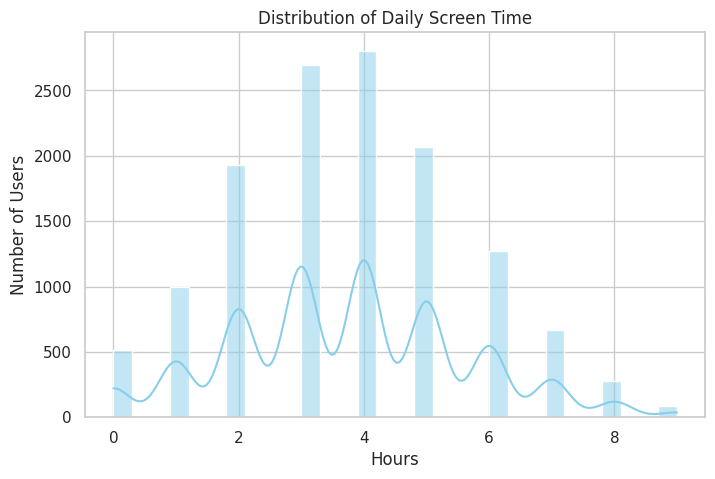

In [6]:
# Plot a histogram of the 'daily_screen_time' column:
#  divides the range of screen time into 30 intervals for detail
plt.figure(figsize=(8, 5))
sns.histplot(df['daily_screen_time'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Daily Screen Time')
plt.xlabel('Hours')
plt.ylabel('Number of Users')
plt.show()


# **Scatter Plot: Notifications vs. Stress Level**


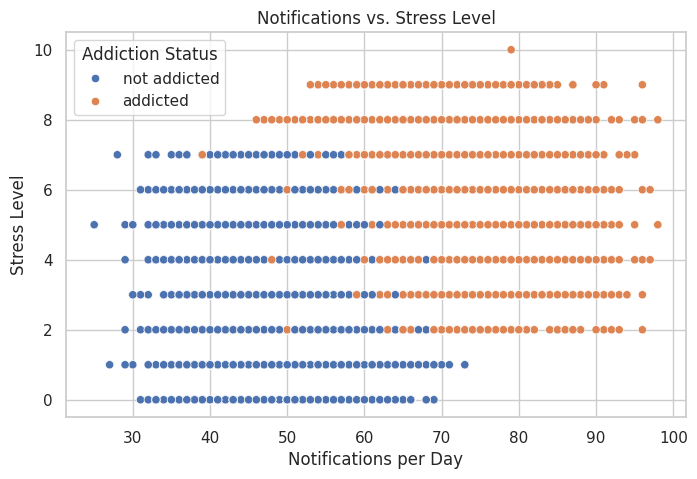

In [7]:
# Plot the relationship between number of notifications and stress level using scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='notifications', y='stress_level', hue='addicted', data=df)
plt.title('Notifications vs. Stress Level')
plt.xlabel('Notifications per Day')
plt.ylabel('Stress Level')
plt.legend(title='Addiction Status')
plt.show()


# **correlation matrix**


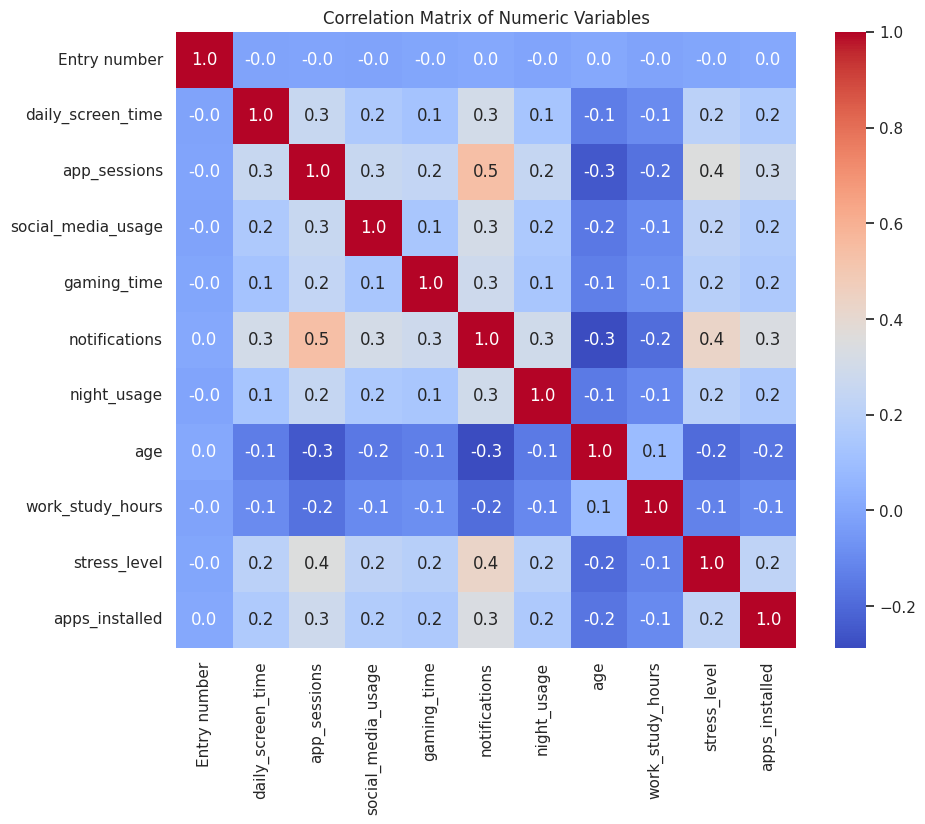

In [8]:
# Compute the correlation matrix between all numeric variables
# Select only the numeric columns from the DataFrame
# This ensures correlation calculations exclude non-numeric or categorical data
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include='number')
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()



# **Bar Plot: Average Social Media Usage by Addiction Status**




<ipython-input-9-a234c55ec5a9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='addicted', y='social_media_usage', data=avg_social, palette='Set2')


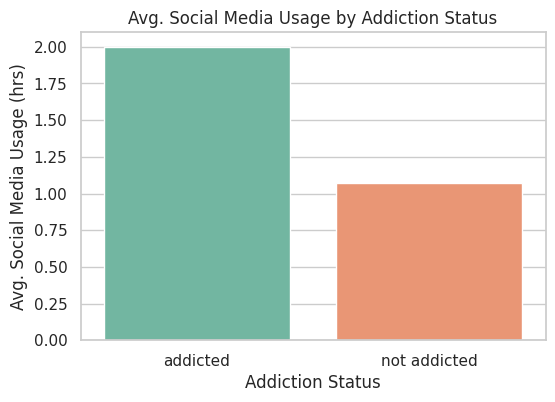

In [9]:
# Group the dataset by 'addicted' status and calculate the mean social media usage for each group
# Reset the index to convert the result into a regular DataFrame for plotting
avg_social = df.groupby('addicted')['social_media_usage'].mean().reset_index()
# Plot the average social media usage:
plt.figure(figsize=(6, 4))
sns.barplot(x='addicted', y='social_media_usage', data=avg_social, palette='Set2')
plt.title('Avg. Social Media Usage by Addiction Status')
plt.xlabel('Addiction Status')
plt.ylabel('Avg. Social Media Usage (hrs)')
plt.show()

# **Pie Chart: Addiction Class Distribution**

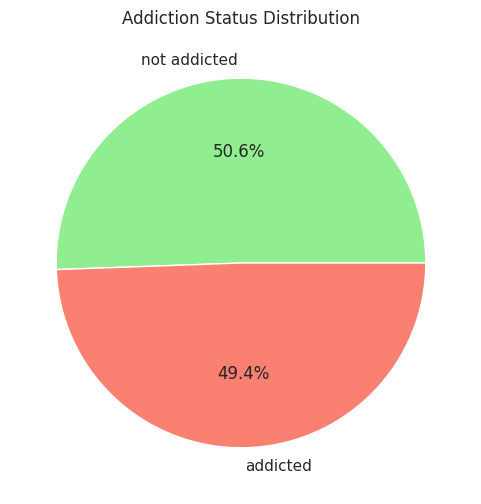

In [10]:
plt.figure(figsize=(6, 6))
# Count values in 'addicted' column
addiction_counts = df['addicted'].value_counts()
# Plot pie chart with percentages and custom colors
plt.pie(addiction_counts, labels=addiction_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Addiction Status Distribution')
plt.show()



# **Scatter Plot:Apps Installed vs. Social Media Usage**



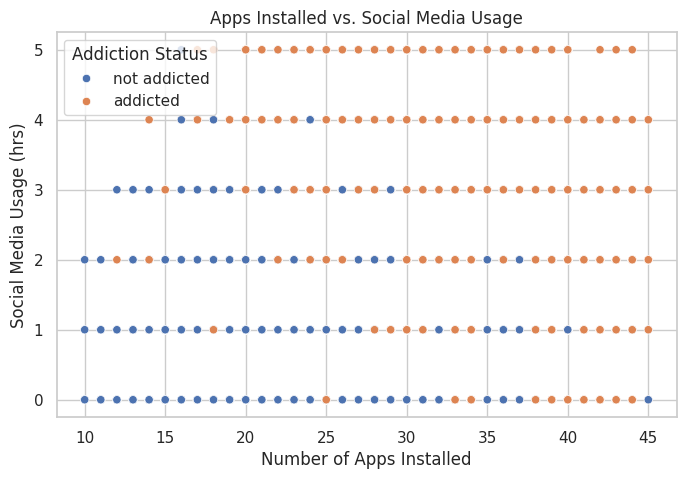

In [11]:
# Scatter plot: apps installed vs social media usage, color by addiction status
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='apps_installed', y='social_media_usage', hue='addicted')
plt.title('Apps Installed vs. Social Media Usage')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Social Media Usage (hrs)')
plt.legend(title='Addiction Status')
plt.show()


# **Bar plot: average work/study hours between users who are "addicted" vs. "not addicted".**

<ipython-input-12-66b4c4aae192>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_work, x='addicted', y='work_study_hours', palette='pastel')


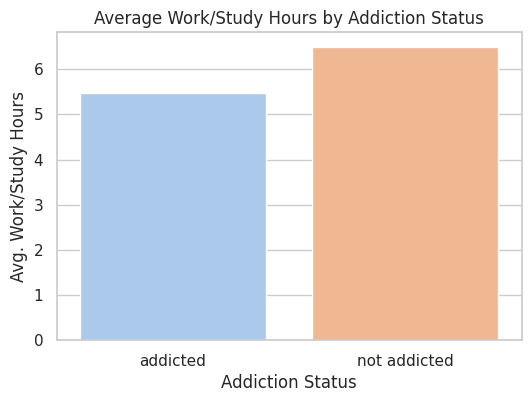

In [12]:
# Group data by addiction status and compute mean work/study hours
avg_work = df.groupby('addicted')['work_study_hours'].mean().reset_index()
plt.figure(figsize=(6, 4))
# Create a bar plot to compare work/study time between groups
sns.barplot(data=avg_work, x='addicted', y='work_study_hours', palette='pastel')
plt.title('Average Work/Study Hours by Addiction Status')
plt.xlabel('Addiction Status')
plt.ylabel('Avg. Work/Study Hours')
plt.show()


# **Daily Screen Time vs. Stress Level**


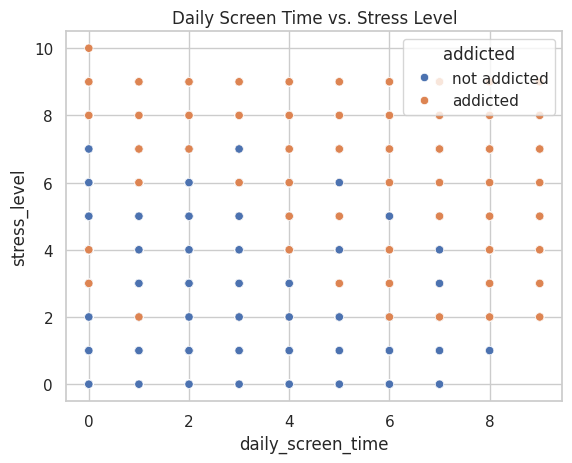

In [13]:
# Plot daily screen time vs. stress level, colored by addiction status
plt.figure()
sns.scatterplot(data=df, x='daily_screen_time', y='stress_level', hue='addicted')
plt.title("Daily Screen Time vs. Stress Level")
plt.show()

# **App Sessions vs. Notifications**

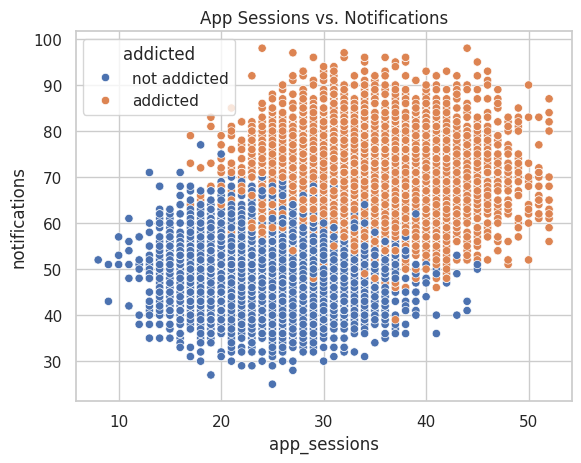

In [14]:
# Plot number of app sessions vs. number of notifications, colored by addiction status

plt.figure()
sns.scatterplot(data=df, x='app_sessions', y='notifications', hue='addicted')
plt.title("App Sessions vs. Notifications")
plt.show()

# **histogram of age**


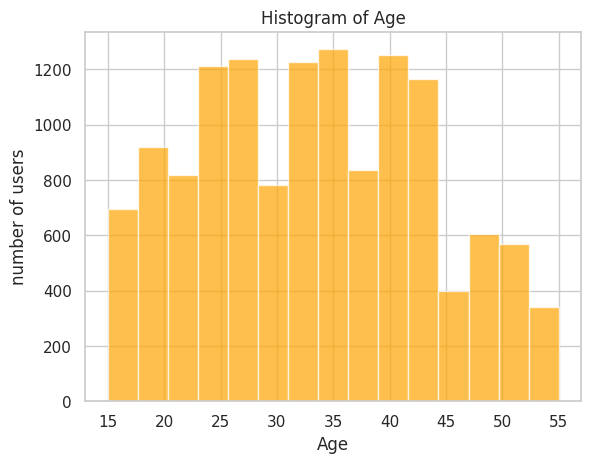

In [15]:
# Plot a histogram of the 'age' column with 15 bins
df['age'].hist(bins=15, alpha=0.7, color='orange')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("number of users")
plt.show()


# **Night Usage Histogram**

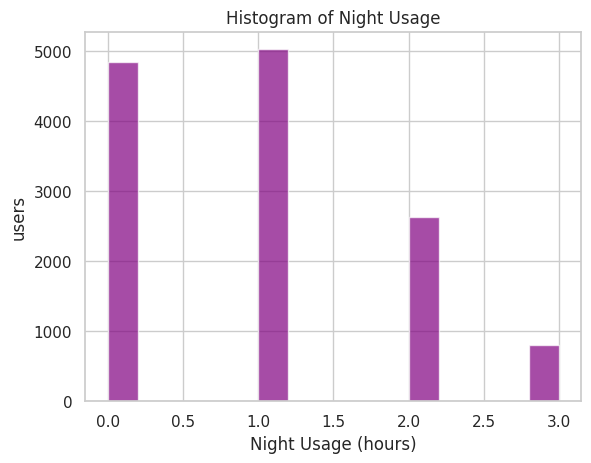

In [17]:
# Plot a histogram of 'night_usage' with 15 bins
plt.figure()
df['night_usage'].hist(bins=15, alpha=0.7, color='purple')
plt.title("Histogram of Night Usage")
plt.xlabel("Night Usage (hours)")
plt.ylabel("users")
plt.show()

# **Stress Level by Addiction Status**

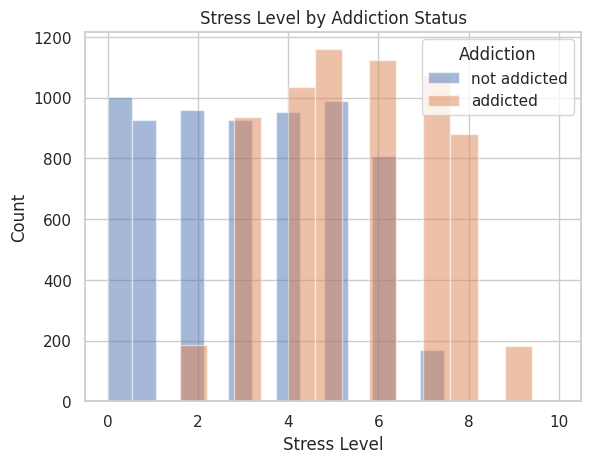

In [18]:
plt.figure()
# Loop through unique addiction statuses
# Plot histograms of stress level for each group
for label in df['addicted'].unique():
    subset = df[df['addicted'] == label]
    subset['stress_level'].hist(bins=15, alpha=0.5, label=label)

plt.title("Stress Level by Addiction Status")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.legend(title='Addiction')
plt.show()


# **Work/Study Time vs. Addiction**

<ipython-input-19-ae7dff8caa84>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=work_avg, x='addicted', y='work_study_hours', palette='Set2')


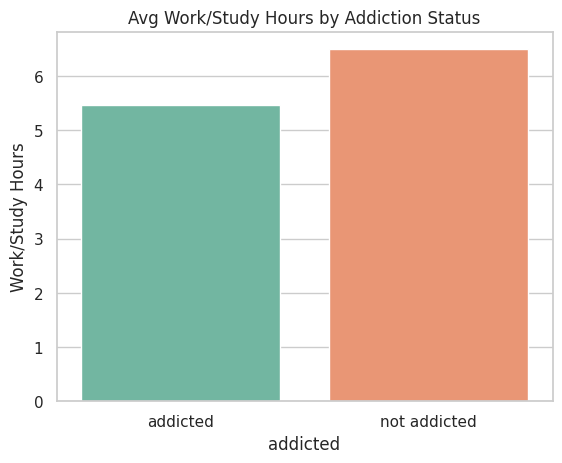

In [19]:
# Calculate average work/study hours grouped by addiction status
work_avg = df.groupby('addicted')['work_study_hours'].mean().reset_index()
sns.barplot(data=work_avg, x='addicted', y='work_study_hours', palette='Set2')
plt.title("Avg Work/Study Hours by Addiction Status")
plt.ylabel("Work/Study Hours")
plt.show()

# **Average Stress Level by Addiction Status**

<ipython-input-20-a04d71ba8f73>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_stress, x='addicted', y='stress_level', palette='coolwarm')


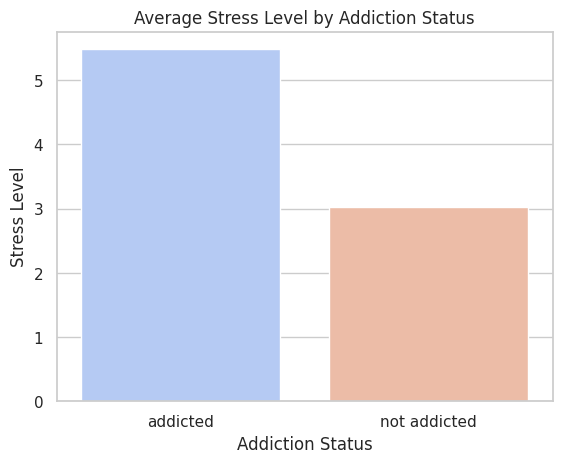

In [20]:
# Calculate mean stress level for each addiction group
# Create bar plot to emphasize differences
avg_stress = df.groupby('addicted')['stress_level'].mean().reset_index()
sns.barplot(data=avg_stress, x='addicted', y='stress_level', palette='coolwarm')
plt.title("Average Stress Level by Addiction Status")
plt.ylabel("Stress Level")
plt.xlabel("Addiction Status")
plt.show()


# **Average Gaming Time by Addiction Status**

<ipython-input-21-02df5e357a99>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_gaming, x='addicted', y='gaming_time', palette='coolwarm')


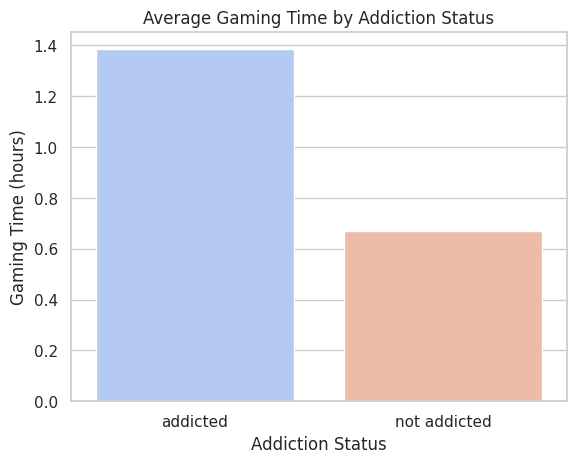

In [21]:
# Calculate average gaming time grouped by addiction status
# Plot a bar chart to highlight differences
avg_gaming = df.groupby('addicted')['gaming_time'].mean().reset_index()
sns.barplot(data=avg_gaming, x='addicted', y='gaming_time', palette='coolwarm')
plt.title("Average Gaming Time by Addiction Status")
plt.ylabel("Gaming Time (hours)")
plt.xlabel("Addiction Status")
plt.show()


# **Night Usage vs. Notifications**

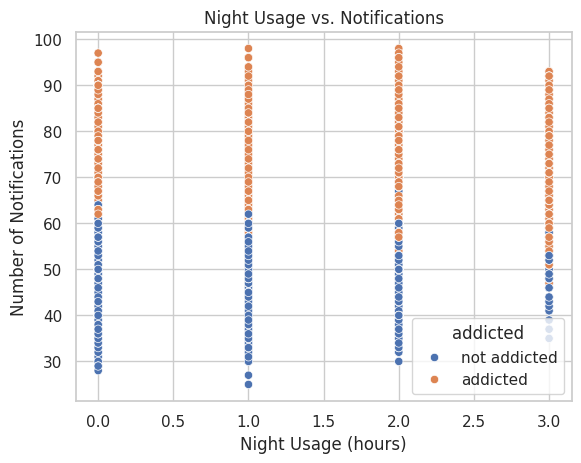

In [23]:
# Scatter plot showing relationship between night usage and notifications
# Points colored by addiction status for group comparison
sns.scatterplot(data=df, x='night_usage', y='notifications', hue='addicted')
plt.title("Night Usage vs. Notifications")
plt.xlabel("Night Usage (hours)")
plt.ylabel("Number of Notifications")
plt.show()